In [ ]:
a = [1, 2, 3, 4, 5]

# Rotate right by n
n = 2  
rotated_list = a[-n:] + a[:-n] 
print(rotated_list)

[4, 5, 1, 2, 3]


In [ ]:
a = [1, 2, 3, 4, 5]

# Rotate left by n
n = 1  
rotated_list = a[n:] + a[0:n] 
print(rotated_list)

[2, 3, 4, 5, 1]


In [4]:
4%4


0

In [8]:
bFirstLap = True
cp_set = set()

couple1 = (0, 0)
couple2 = (0, 1)
couple3 = (1, 0)
couple4 = (1, 1)
# couple5 = (1, 2)
# couple6 = (2, 1)
# couple6 = (2, 2)
list_couples = [couple1, couple2, couple4, couple1] 
for couple in list_couples:
    if couple not in cp_set:
        cp_set.add(couple)
    else:
        bFirstLap = False

In [10]:
this = False
that = True
if this :
    bob = 1
    if that :
        bob = 2
else :
    bob = 42

In [18]:
couple1 = (0, 0)
couple2 = (0, 1)
couple3 = (1, 0)
couple4 = (1, 1)
list_couples = [couple1, couple2, couple3, couple4] 
Id = list_couples.index(couple3)
print(Id)

2


In [17]:
couple1 = (0, 0)
couple2 = (0, 1)
couple3 = (1, 0)
couple4 = (1, 1)
list_couples = [couple1, couple2, couple3, couple4] 

if (1,0) not in list_couples:
    print("Not here")
else:
    print("Here")

Here


In [ ]:
# Si angle au delà de 90° => 0, sinon regle de 3 entre 0 et 90 pour aller de 0 à 100
import math
angle = 0
if angle > 90 or angle < -90:
    angle = 90
else:
    angle = angle%90
angle = abs(angle)
angle = angle/180*math.pi
thrust = int(100*math.cos(angle))

print(thrust)


100


In [ ]:
import math
angle = 0
if angle > 135 or angle < -135:
    angle = 135
else:
    angle = angle%135
angle = abs(angle)
angle = angle/180*math.pi
thrust = int(100*math.cos(angle))

print(thrust)


In [ ]:
# Je veux entre MinThrottle et FullThrottle quand angle varie de 90° à 0°

import math

k_MinThrottle = 0
k_FullThrottle = 100

next_checkpoint_angle = 0
if next_checkpoint_angle > 90 or next_checkpoint_angle < -90:
    angle = 90
else:
    angle = abs(next_checkpoint_angle)
    angle = angle%90

angle = angle/180*math.pi
thrust = int((k_FullThrottle-k_MinThrottle)*math.cos(angle)+k_MinThrottle)

print(thrust)


# Bezier Curve

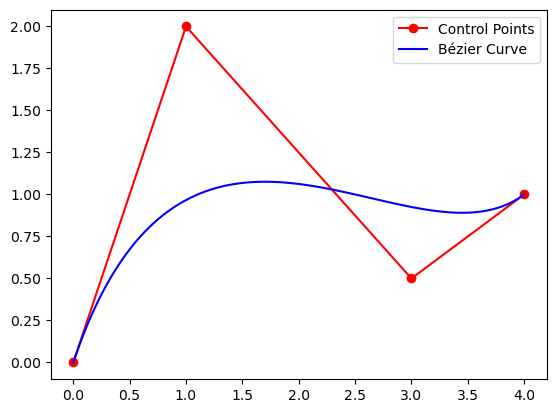

In [3]:
import matplotlib.pyplot as plt
import math

def binomial_coeff(n, k):
    """Computes the binomial coefficient (n choose k)."""
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

def bernstein(n, i, t):
    """Computes the Bernstein polynomial B_{i,n}(t)."""
    return binomial_coeff(n, i) * (t ** i) * ((1 - t) ** (n - i))

def bezier_curve(control_points, num_points=100):
    """Generates points on a Bézier curve given control points."""
    n = len(control_points) - 1  # Degree of the curve
    curve = []

    for t in [i / num_points for i in range(num_points + 1)]:
        x, y = 0, 0
        for i, (px, py) in enumerate(control_points):
            b = bernstein(n, i, t)
            x += b * px
            y += b * py
        curve.append((x, y))

    return curve

# Example: Cubic Bézier curve (4 control points)
control_pts = [(0, 0), (1, 2), (3, .5), (4, 1)]
curve_pts = bezier_curve(control_pts, num_points=100)

# Plotting
plt.plot(*zip(*control_pts), 'ro-', label="Control Points")  # Control points
plt.plot(*zip(*curve_pts), 'b-', label="Bézier Curve")  # Bézier curve
plt.legend()
plt.show()


# Bézier Interpolate - Chaîne de Bézier

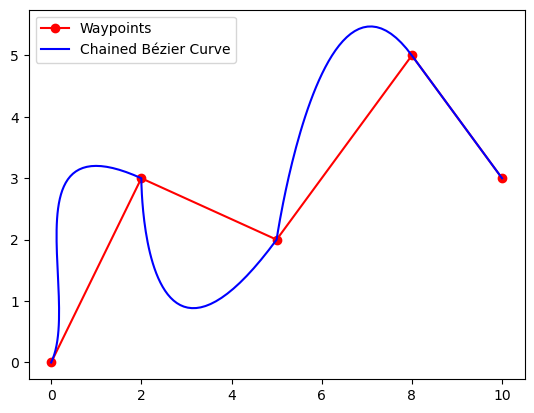

In [7]:
import matplotlib.pyplot as plt
import math

def binomial_coeff(n, k):
    """Computes the binomial coefficient (n choose k)."""
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

def bernstein(n, i, t):
    """Computes the Bernstein polynomial B_{i,n}(t)."""
    return binomial_coeff(n, i) * (t ** i) * ((1 - t) ** (n - i))

def bezier_curve(control_points, num_points=100):
    """Generates points on a Bézier curve given control points."""
    n = len(control_points) - 1  # Degree of the curve
    curve = []

    for t in [i / num_points for i in range(num_points + 1)]:
        x, y = 0, 0
        for i, (px, py) in enumerate(control_points):
            b = bernstein(n, i, t)
            x += b * px
            y += b * py
        curve.append((x, y))

    return curve

def chained_bezier(points, num_points=100):
    """Generates a smooth path using chained Bézier curves."""
    if len(points) < 3:
        raise ValueError("At least 3 points are needed for a chained Bézier curve.")

    all_curve_points = []
    for i in range(len(points) - 1):
        # Define control points dynamically
        p0 = points[i]
        p3 = points[i + 1]

        # Automatic control points to keep smoothness
        if i == 0:  # First segment
            p1 = (p0[0] + (p3[0] - p0[0]) / 3, p0[1] + (p3[1] - p0[1]) / 3)
        else:
            p1 = (2 * p0[0] - all_curve_points[-1][0], 2 * p0[1] - all_curve_points[-1][1])

        if i == len(points) - 2:  # Last segment
            p2 = (p3[0] - (p3[0] - p0[0]) / 3, p3[1] - (p3[1] - p0[1]) / 3)
        else:
            next_p = points[i + 2]
            p2 = (2 * p3[0] - next_p[0], 2 * p3[1] - next_p[1])

        # Compute Bézier curve for this segment
        segment_curve = bezier_curve([p0, p1, p2, p3], num_points)
        all_curve_points.extend(segment_curve)

    return all_curve_points

waypoints = [(0, 0), (2, 3), (5, 2), (8, 5), (10, 3)]

curve = chained_bezier(waypoints, num_points=50)

plt.plot(*zip(*waypoints), 'ro-', label="Waypoints")  # Waypoints
plt.plot(*zip(*curve), 'b-', label="Chained Bézier Curve")  # Chained Bézier curve
plt.legend()
plt.show()



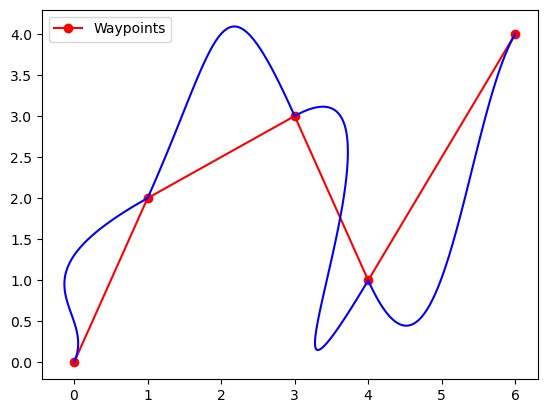

In [5]:
import matplotlib.pyplot as plt

def compute_control_points(points):
    """Computes control points for a Bézier chain ensuring smooth transitions."""
    n = len(points) - 1  # Number of segments
    control_pts = []

    for i in range(n):
        P0 = points[i]
        P3 = points[i + 1]
        
        # Estimate control points for smooth transition
        if i == 0:  
            P1 = (P0[0] + (P3[0] - P0[0]) / 3, P0[1] + (P3[1] - P0[1]) / 3)
        else:
            prev = points[i - 1]
            P1 = (2 * P0[0] - prev[0], 2 * P0[1] - prev[1])

        if i == n - 1:
            P2 = (P3[0] - (P3[0] - P0[0]) / 3, P3[1] - (P3[1] - P0[1]) / 3)
        else:
            next_pt = points[i + 2]
            P2 = (2 * P3[0] - next_pt[0], 2 * P3[1] - next_pt[1])

        control_pts.append([P0, P1, P2, P3])

    return control_pts

def bernstein(n, i, t):
    """Computes the Bernstein polynomial B_{i,n}(t)."""
    from math import comb
    return comb(n, i) * (t ** i) * ((1 - t) ** (n - i))

def bezier_curve(control_points, num_points=100):
    """Generates Bézier curve points given four control points."""
    n = len(control_points) - 1
    curve = []

    for t in [i / num_points for i in range(num_points + 1)]:
        x, y = 0, 0
        for i, (px, py) in enumerate(control_points):
            b = bernstein(n, i, t)
            x += b * px
            y += b * py
        curve.append((x, y))

    return curve

# Define waypoints (points to pass through)
waypoints = [(0, 0), (1, 2), (3, 3), (4, 1), (6, 4)]

# Compute smooth control points
control_segments = compute_control_points(waypoints)

# Generate and plot Bézier chain
plt.plot(*zip(*waypoints), 'ro-', label="Waypoints")

for segment in control_segments:
    curve_points = bezier_curve(segment)
    plt.plot(*zip(*curve_points), 'b-')

plt.legend()
plt.show()


# smooth chained bezier

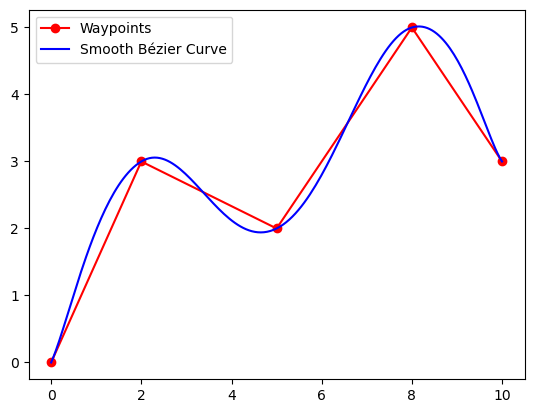

In [8]:
import matplotlib.pyplot as plt

def bezier_curve(control_points, num_points=100):
    """Generates points on a Bézier curve given control points."""
    n = len(control_points) - 1  # Degree of the curve
    curve = []
    
    for t in [i / num_points for i in range(num_points + 1)]:
        x, y = 0, 0
        for i, (px, py) in enumerate(control_points):
            b = (math.comb(n, i) * (t**i) * ((1 - t)**(n - i)))  # Bernstein polynomial
            x += b * px
            y += b * py
        curve.append((x, y))
    
    return curve

def smooth_chained_bezier(points, num_points=100, smooth_factor=0.5):
    """Generates a smooth chain of Bézier curves with G1 continuity."""
    if len(points) < 3:
        raise ValueError("At least 3 points are needed for a chained Bézier curve.")

    all_curve_points = []
    
    for i in range(len(points) - 1):
        p0 = points[i]
        p3 = points[i + 1]

        # Calculate tangent vectors
        if i == 0:  # First segment
            t0 = ((p3[0] - p0[0]), (p3[1] - p0[1]))
        else:
            t0 = ((p3[0] - points[i - 1][0]), (p3[1] - points[i - 1][1]))

        if i == len(points) - 2:  # Last segment
            t1 = ((p3[0] - p0[0]), (p3[1] - p0[1]))
        else:
            t1 = ((points[i + 2][0] - p0[0]), (points[i + 2][1] - p0[1]))

        # Compute control points based on tangents
        p1 = (p0[0] + smooth_factor * t0[0], p0[1] + smooth_factor * t0[1])
        p2 = (p3[0] - smooth_factor * t1[0], p3[1] - smooth_factor * t1[1])

        # Compute Bézier curve for this segment
        segment_curve = bezier_curve([p0, p1, p2, p3], num_points)
        all_curve_points.extend(segment_curve)

    return all_curve_points

# Example: Waypoints for the trajectory
waypoints = [(0, 0), (2, 3), (5, 2), (8, 5), (10, 3)]

# Generate smooth Bézier path
curve = smooth_chained_bezier(waypoints, num_points=50, smooth_factor=0.2)

# Plot results
plt.plot(*zip(*waypoints), 'ro-', label="Waypoints")  # Waypoints
plt.plot(*zip(*curve), 'b-', label="Smooth Bézier Curve")  # Smooth Bézier curve
plt.legend()
plt.show()
